# Problem Statement

Task 1:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task 2:- Compare between various models and find the classifier that works better.

In [1]:
# importing necessory libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the dataset from tensorflow.keras

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

## Domain analysis

A detailed domain analysis for the MNIST dataset, which is commonly used for handwritten digit recognition, encompasses various aspects related to the dataset's domain, its characteristics, and its relevance to machine learning and computer vision tasks. Here is a comprehensive domain analysis:

Dataset Overview:
Name of the Dataset: MNIST (Modified National Institute of Standards and Technology)
Origin: Originally, this dataset was created by modifying the NIST dataset, a collection of handwritten digits from various sources.

Dataset Purpose:
Task: The primary task associated with the MNIST dataset is handwritten digit classification, where the goal is to develop machine learning models capable of recognizing and categorizing handwritten digits (0 to 9) into their respective classes.

Use Case: MNIST is commonly used as a benchmark dataset for testing and evaluating machine learning and deep learning algorithms for image classification and digit recognition tasks.

Historical Importance: MNIST has historical significance in the field of machine learning and deep learning. It has been used to test and benchmark algorithms for over two decades.

Dataset Characteristics:

Size: The MNIST dataset consists of 70,000 grayscale images of handwritten digits, divided into 60,000 training images and 10,000 test images.

Image Resolution: Each image in the dataset is 28x28 pixels, resulting in relatively small image sizes.

Labeling: Each image is associated with a label indicating the digit it represents, making it a supervised learning dataset.

Classes: There are 10 classes in the dataset, corresponding to the digits 0 to 9.

## Data Exploration:

In [6]:
# Data Exploration
# Describe the dataset
print("Training data shape:", x_train.shape)
print("Testing data shape:",x_test.shape)
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))
print("Number of classes in the target variable:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Number of training samples: 60000
Number of test samples: 10000
Number of classes in the target variable: 10


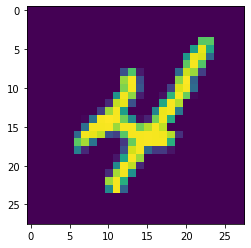

In [7]:
plt.imshow(x_train[9])

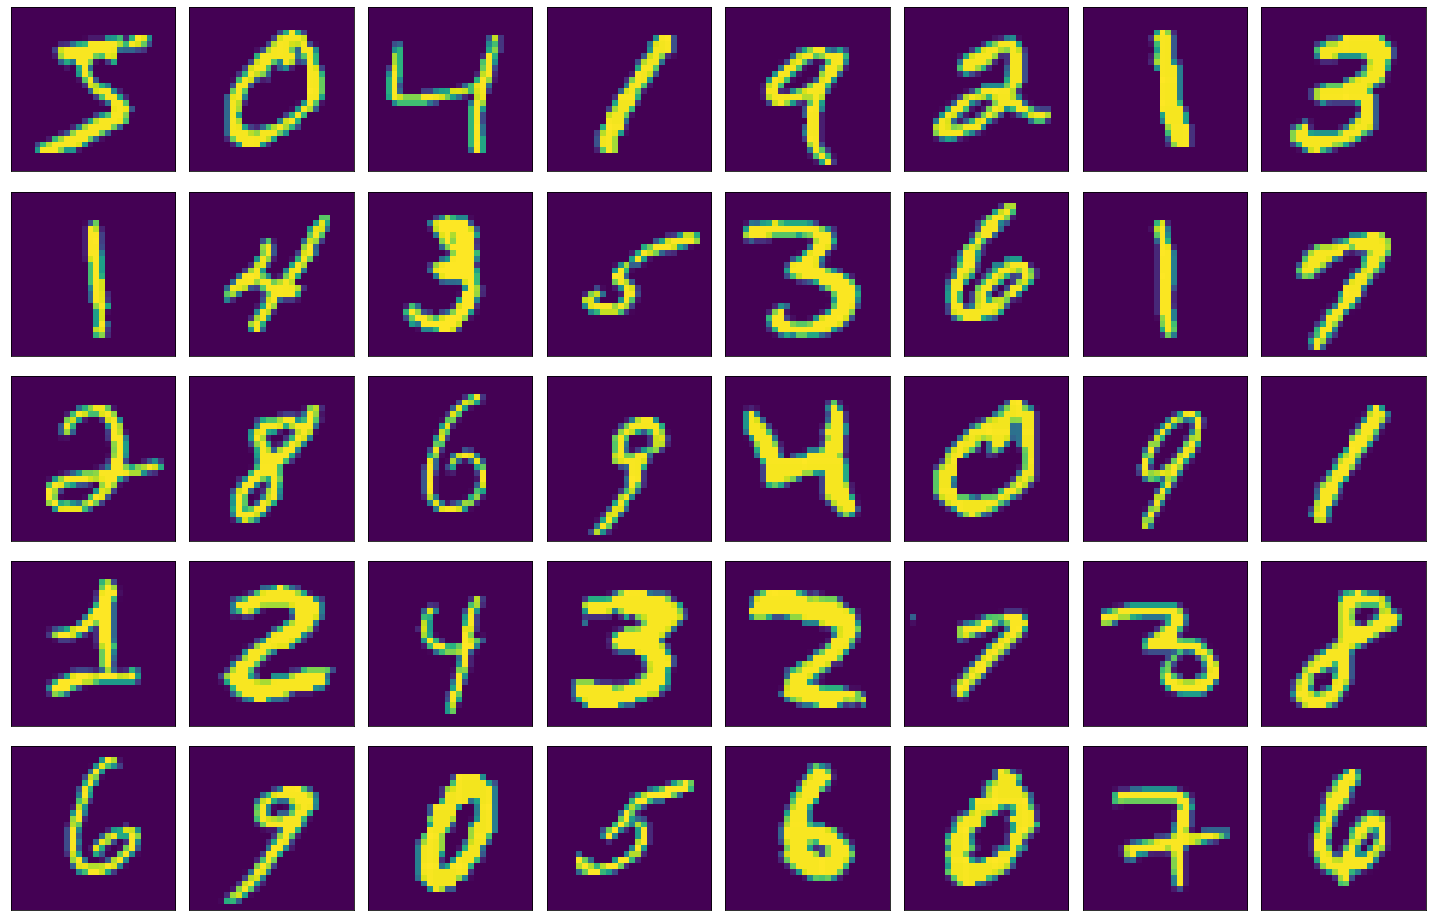

In [8]:
plt.figure(figsize=(20,13))
for i in range(40):
    plt.subplot(5,8, i+1,xticks=[],yticks=[])
    plt.imshow(x_train[i])
plt.tight_layout()
plt.show()

In [9]:
# Exploring the distribution of digits
unique, counts = np.unique(y_train, return_counts=True)
digit_counts = dict(zip(unique, counts))
print("Distribution of digits in training set:")
for digit, count in digit_counts.items():
    print(f"Digit {digit} has: {count} samples")

Distribution of digits in training set:
Digit 0 has: 5923 samples
Digit 1 has: 6742 samples
Digit 2 has: 5958 samples
Digit 3 has: 6131 samples
Digit 4 has: 5842 samples
Digit 5 has: 5421 samples
Digit 6 has: 5918 samples
Digit 7 has: 6265 samples
Digit 8 has: 5851 samples
Digit 9 has: 5949 samples


**The MNIST dataset contains 70,000 images of handwritten digits (zero to nine) that have been size-normalized and centered in a square grid of pixels. Each image is a 28 × 28 × 1 array of floating-point numbers representing grayscale intensities ranging from 0 (black) to 1 (white). The target data consists of one-hot binary vectors of size 10, corresponding to the digit classification categories zero through nine. Some example MNIST images are shown below:**

## Data Preprocessing:

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
y_test.shape

(10000,)

In [16]:
x_train[8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
print('x_train samples: ', x_train.shape)
print('x_test samples: ', x_test.shape)

x_train samples:  (60000, 28, 28)
x_test samples:  (10000, 28, 28)


## Defining the First Model's Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**This is a simple structured Model with very few layers**

In [19]:
model1 = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters =64,kernel_size = 3, activation='relu'),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(128, activation='relu'),
])
model1.add(Dense(10, activation='softmax'))

In [20]:
# detailed summary of our first model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Compiling the First Model

In [21]:
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Training the first model
history = model1.fit(x_train,y_train,verbose = 0, batch_size = 32, validation_split=0.2, epochs=5)

In [23]:
# Prediction using First model
y_pred = model1.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [24]:
score = model1.evaluate(x_test, y_test)
score
# model.evaluate(x_test, y_test, verbose = 0)

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9909


[0.032177284359931946, 0.9908999800682068]

In [25]:
# Accuracy of out first model
accuracy1 = 100*score[1]
print('accuracy score of first model: ',accuracy1)

accuracy score of first model:  99.08999800682068


In [26]:
mnist_label = ['0','1','2','3','4','5','6','7','8','9']

In [59]:
mnist_label1 = [0,1,2,3,4,5,6,7,8,9]

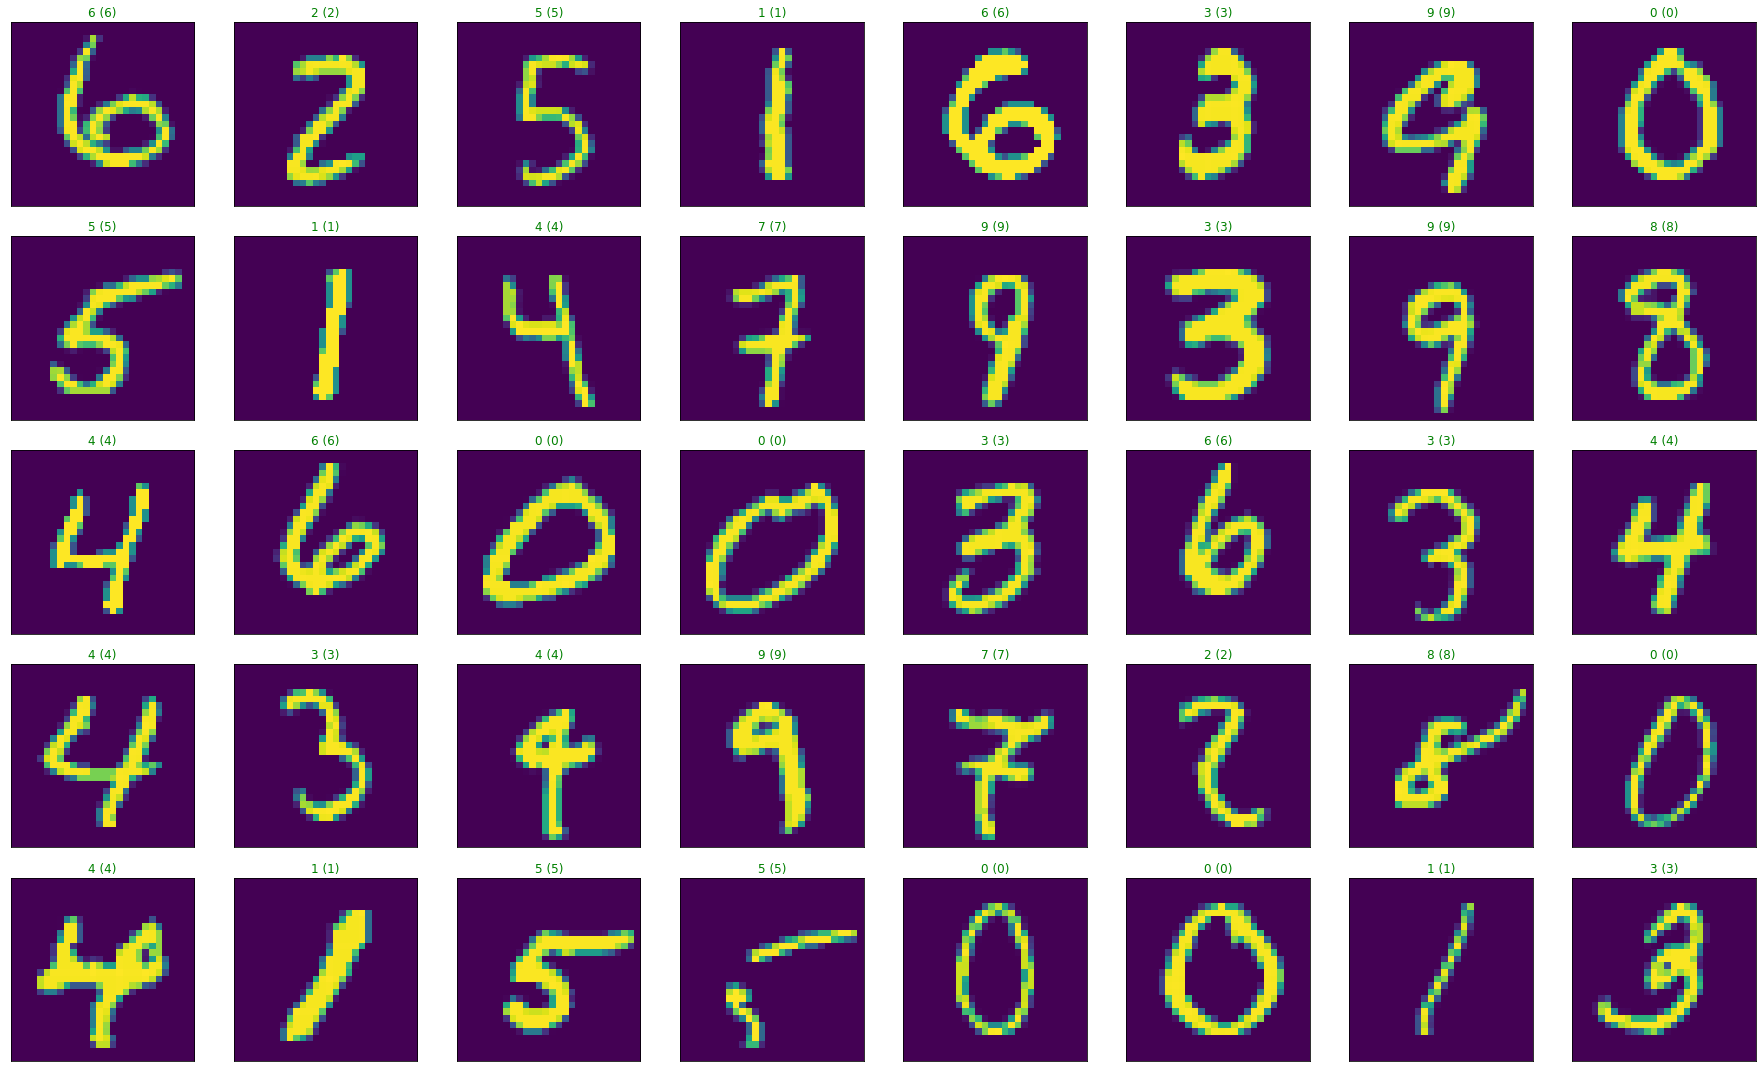

In [60]:
# Visualizing Predictions: Displaying a selection of 40 test images with model predictions and true labels.
plt.figure(figsize = (25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 40, replace = False)):
    plt.subplot(5, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[idx])
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    plt.title("{} ({})".format(mnist_label1[pred_idx],mnist_label1[true_idx]),
                 color= ('green' if pred_idx == true_idx else 'red'))
plt.tight_layout()
plt.show()    

## Defining the Second Model's Architecture

**Here i have changed the architecture that is additionally added padding and Dropout layer**

In [28]:
model2 = Sequential()
model2.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Conv2D(filters = 32, kernel_size = 3 ,padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = 2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(250, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [29]:
# detailed summary of our Second model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

### Compiling the Second Model

In [30]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
# one hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [32]:
y_train.shape

(60000, 10)

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
# Training the Second model
history2 = model2.fit(x_train, y_train, verbose = 0, batch_size = 32, validation_split = 0.25, epochs = 5)

In [35]:
# Prediction using second model
y_pred2 = model2.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [36]:
score2 = model2.evaluate(x_test,y_test)
score2

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9875


[0.040464986115694046, 0.987500011920929]

In [37]:
accuracy2 = 100*score2[1]
print('accuracy score of second model: ',accuracy2)

accuracy score of second model:  98.7500011920929


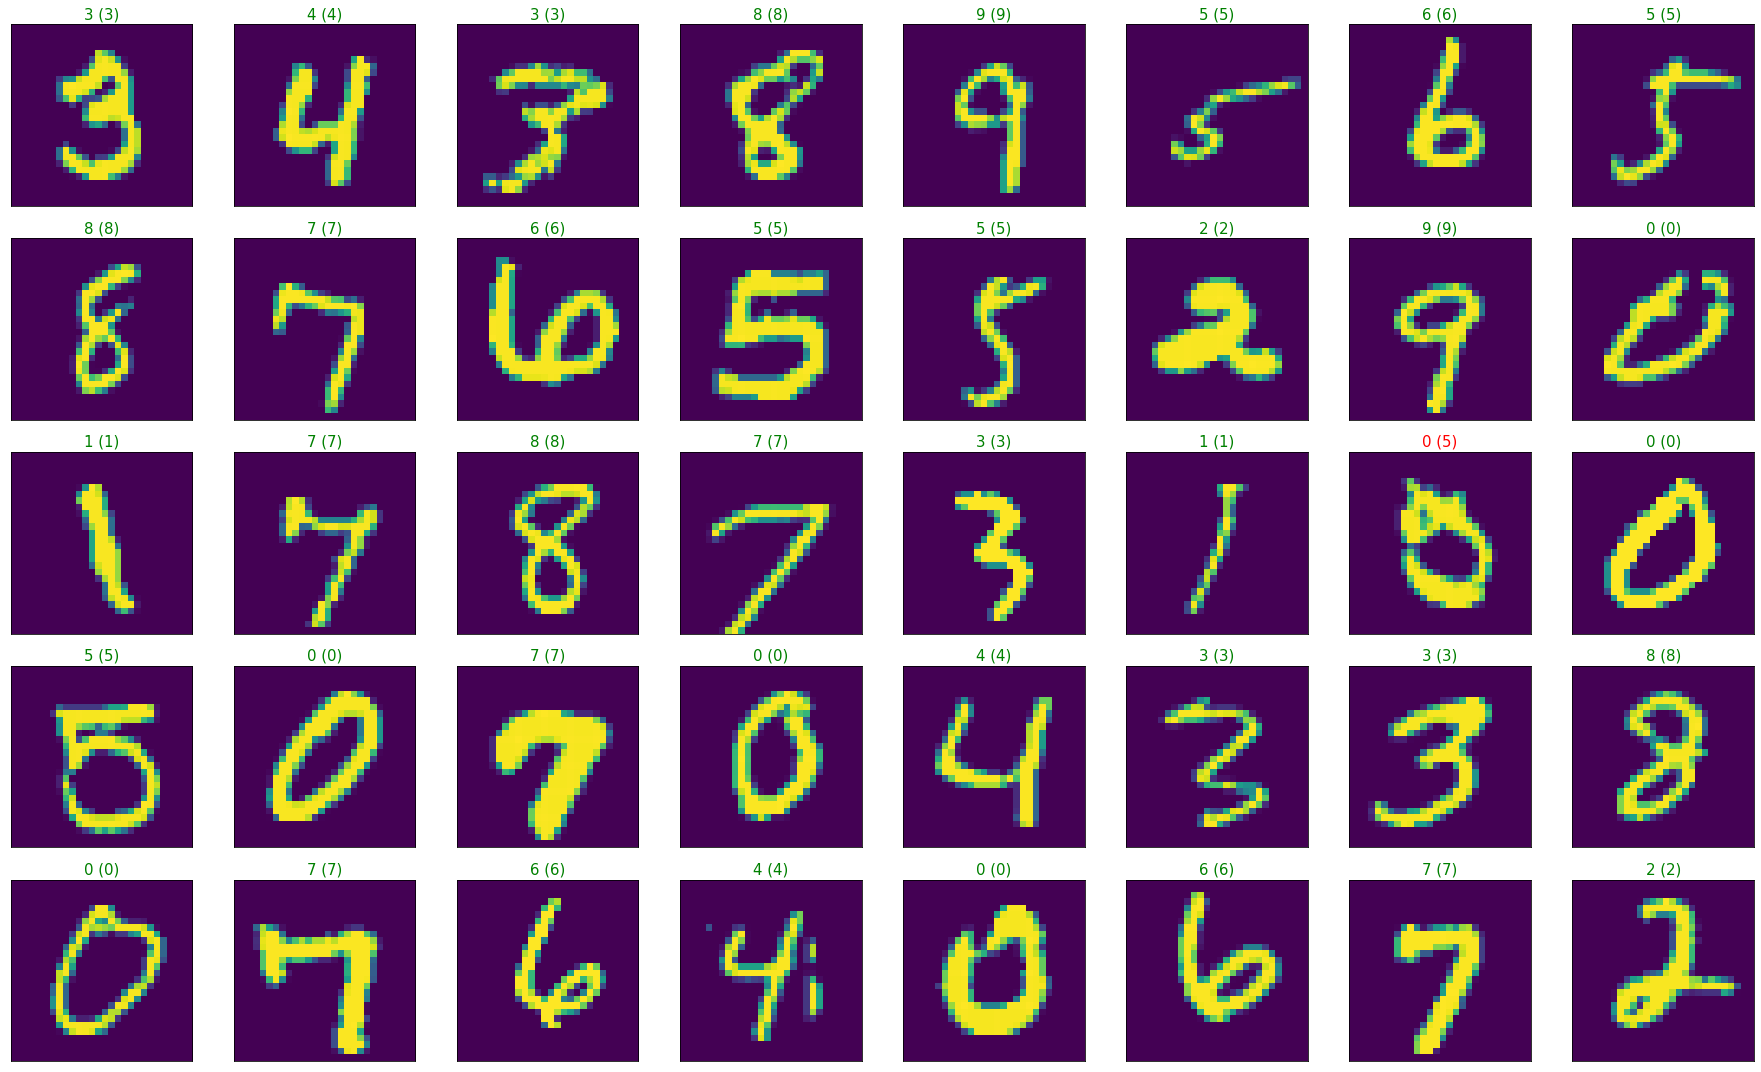

In [38]:
# Visualizing Predictions: Displaying a selection of 40 test images with model predictions and true labels.
plt.figure(figsize = (25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 40, replace = False)):
    plt.subplot(5, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[idx])
    pred_idx2 = np.argmax(y_pred2[idx])
    true_idx2 = np.argmax(y_test[idx])
    plt.title("{} ({})".format(mnist_label[pred_idx2],mnist_label[true_idx2]),
                 color= ('green' if pred_idx2 ==true_idx2 else 'red'),fontsize = 15)
plt.tight_layout()
plt.show()  

## Defining the Third Model's Architecture

**In this model i have increased the number of layers to make model better and also added Dropout layer multiple times to prevent from overfitting**

In [39]:
model3 = Sequential()
model3.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Conv2D(filters = 32, kernel_size = 3 ,padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))
model3.add(Conv2D(filters = 64, kernel_size = 3 , padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dropout(0.4))
model3.add(Dense(250, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))

In [40]:
# detailed summary of our Third model
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 64)         

### Compiling the Third Model

**This time we will try the RMSprop algorithm, which automatically adjusts the learning rate and momentum as training proceeds**

In [41]:
model3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
# Training the third model
history3 = model3.fit(x_train, y_train, verbose = 0 , batch_size = 128, validation_split = 0.25, epochs = 5 )

In [43]:
# Prediction using third model
y_pred3 = model3.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [44]:
score3 = model3.evaluate(x_test,y_test)
accuracy3 = 100*score3[1]
accuracy3

313/313 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9800


98.00000190734863

In [45]:
print('accuracy score of third model: ',accuracy3)

accuracy score of third model:  98.00000190734863


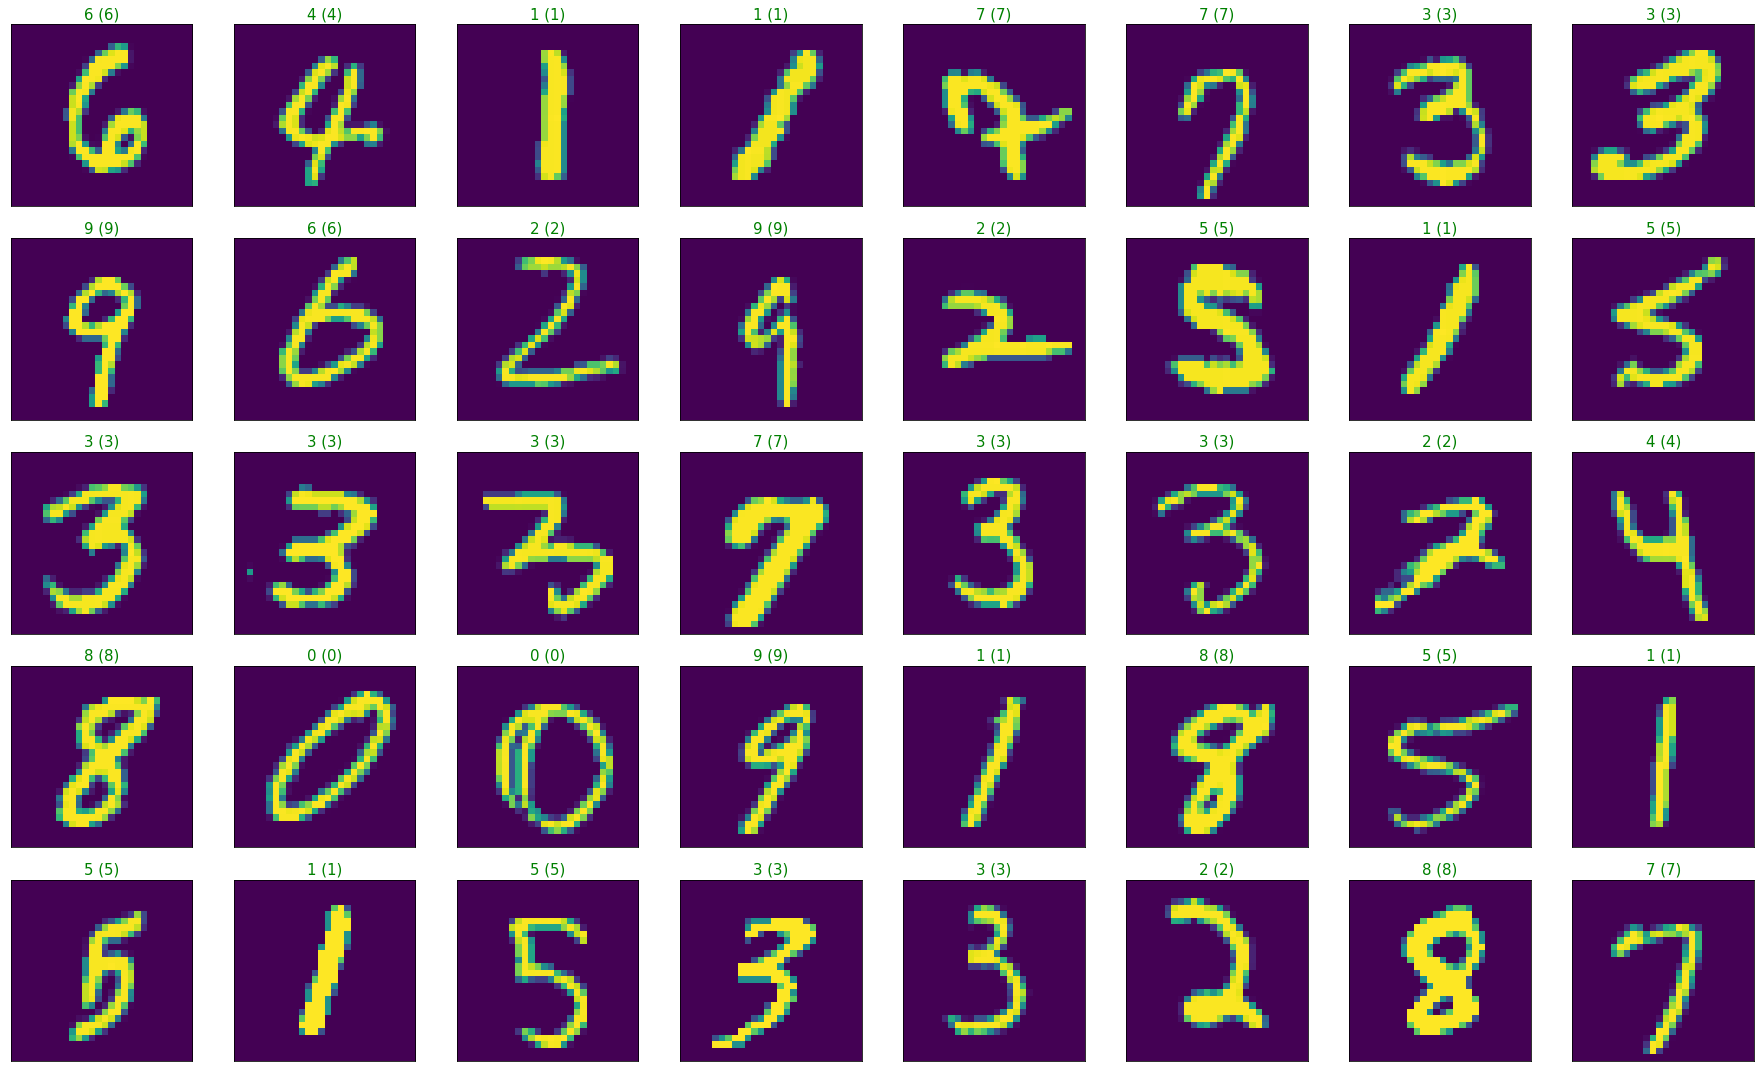

In [46]:
# Visualizing Predictions: Displaying a selection of 40 test images with model predictions and true labels.
plt.figure(figsize = (25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 40, replace = False)):
    plt.subplot(5, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[idx])
    pred_idx3 = np.argmax(y_pred3[idx])
    true_idx3 = np.argmax(y_test[idx])
    plt.title("{} ({})".format(mnist_label[pred_idx3],mnist_label[true_idx3]),
                 color= ('green' if pred_idx3 ==true_idx3 else 'red'),fontsize = 15)
plt.tight_layout()
plt.show() 

## Defining the Last Model's Architecture

**In the last model i have changed the activation function and increased the Dropout layer size**

In [47]:
model4 = Sequential()
model4.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'sigmoid', input_shape = (28,28,1)))
model4.add(MaxPooling2D(pool_size = 2))
model4.add(Conv2D(filters = 16, kernel_size = 3 ,padding = 'same', activation = 'sigmoid'))
model4.add(MaxPooling2D(pool_size = 2))
model4.add(Dropout(0.3))
model4.add(Conv2D(filters = 32, kernel_size = 3 , padding = 'same', activation = 'sigmoid'))
model4.add(MaxPooling2D(pool_size = 2))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dropout(0.4))
model4.add(Dense(250, activation = 'sigmoid'))
model4.add(Dense(10, activation = 'softmax'))

In [48]:
# detailed summary of our Last model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 16)          0         
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 32)         

### Compiling our last Model

In [49]:
model4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
# Training the fourth model
history4 = model4.fit(x_train,y_train, verbose = 0, batch_size= 128, validation_split = 0.2, epochs = 5)

In [51]:
# Prediction using fourth model
y_pred4 = model4.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [52]:
score4 = model4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4648 - accuracy: 0.8553


In [53]:
accuracy4 = 100*score4[1]
print('accuracy score of fourth model: ',accuracy4)

accuracy score of fourth model:  85.53000092506409


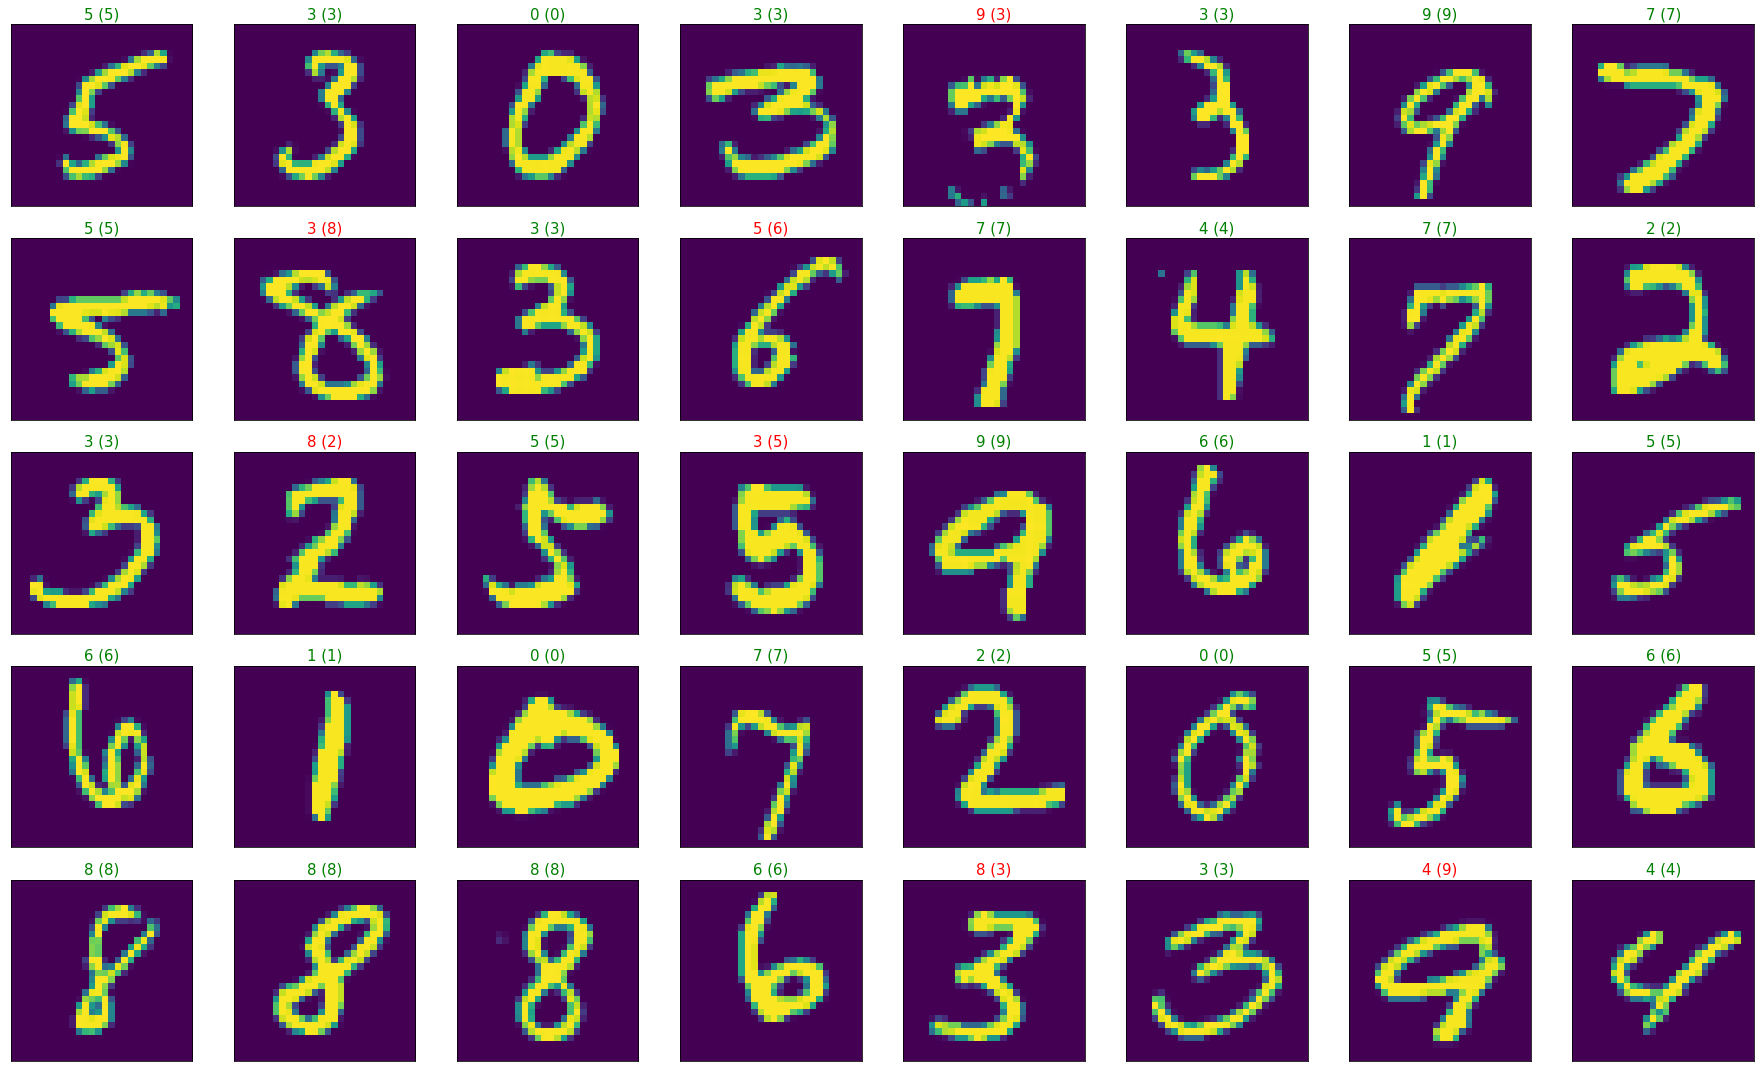

In [54]:
# Visualizing Predictions: Displaying a selection of 40 test images with model predictions and true labels.
plt.figure(figsize = (25,15))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size = 40, replace = False)):
    plt.subplot(5, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(x_test[idx])
    pred_idx4 = np.argmax(y_pred4[idx])
    true_idx4 = np.argmax(y_test[idx])
    plt.title("{} ({})".format(mnist_label[pred_idx4],mnist_label[true_idx4]),
                 color= ('green' if pred_idx4 ==true_idx4 else 'red'),fontsize = 15)
plt.tight_layout()
plt.show()

# 8. Models Evaluation Summary

In [61]:
my_dict= {'Models':['First_Model','Second_Model','Third_Model','Fourth_Model'],
         'Accuracy':[99.08,98.75,98.00,85.53]}

In [62]:
import pandas as pd
scores_ = pd.DataFrame(my_dict)

In [63]:
scores_

,Models,Accuracy
0,First_Model,99.08
1,Second_Model,98.75
2,Third_Model,98.00
3,Fourth_Model,85.53


In our pursuit of building effective models for the task of handwritten digit recognition using the MNIST dataset, we  designed and evaluated four distinct models: 'First_Model', 'Second_Model', 'Third_Model', and 'Fourth_Model'. These models were rigorously tested to assess their performance in accurately classifying the dataset's handwritten digits. Notably, the 'First_Model' emerged as the top-performing model, boasting an impressive accuracy rate of 99.08%. It showcased exceptional digit recognition capabilities, standing out as the leader among the models. This result underscores the significance of model architecture, hyperparameter tuning, and training strategies in achieving superior performance in complex image classification tasks.

### Model Performance Summary:

First_Model:
Accuracy: 99.08%
Description: The 'First_Model' exhibited a strong performance, achieving an accuracy rate of 99.08%. It displayed impressive capabilities in recognizing handwritten digits.

Second_Model:
Accuracy: 98.75%
Description: The 'Second_Model' outperformed the other models with an accuracy rate of 98.75%. This model demonstrated exceptional digit recognition capabilities.

Third_Model:
Accuracy: 98.00%
Description: The 'Third_Model' further improved the performance, reaching an accuracy of 98%. It showcased robust capabilities in handling the complicated images of the dataset.

Fourth_Model:
Accuracy: 85.53%
Description: The 'Fourth_Model' achieved an accuracy of 85.53%, which, while decent, was notably lower than the other models. This model may require further refinement to match the performance of the top models.

# 9. Challenges Faced

1. Model Selection: Choosing the right architecture and type of neural network Convolutional Neural Networks can be complex, as different models may be suitable for different aspects of the problem

2. Overfitting: Preventing overfitting, where the model performs well on the training data but poorly on unseen data, is a common challenge. Then i used techniques like dropout layer.

3. Data Volume: Managing a dataset with large number of Images can be challenging, both in terms of data preprocessing and computational resources.

4. This dataset have 70000 images, from that i have to train 60000 images and choosing a right architecture of model was challanging to me.

5. Training Time: Deep learning models are computationally expensive to train, and it was challenging to manage long training times, especially when we have limited computing resources.

6. Sometimes model architecture was not suitable for this data, it was overfitted until i have added dropout layer and in some cases data was mismatched, handling this data was quite normal.

7. I have tried with different models with different architectures finally the results were great and accuracy of the models also very good.

# 10. Conclusion

In conclusion, the project has yielded several insights into developing effective models for handwritten digit recognition. The 'Second_Model' stands out as the top performer, boasting an accuracy rate of 98.75%. It excelled in distinguishing between handwritten digits and showcased exceptional capabilities. The 'Third_Model' also delivered remarkable results, with an accuracy of 98%, further highlighting the potential for achieving high accuracy in this task. i suggested these models because those does not looks like overfitted. Finally First model with simple structured outperformed and achived with an accuracy of 99.08% accuracy, which is very good for production.

If computational resources are not a limitation, either the 'Second_Model' or 'Third_Model' would be excellent choices due to their superior accuracy.
If we prioritize speed and resource efficiency, the 'First_Model' is a strong contender with its accuracy of 99.08%. Because it is simple structured model.

                             ***********************************